# Chi-Square Test

**The chi-squared (χ²) test** is a statistical test that is used to determine whether there is a significant association between two categorical variables. It is often used in feature selection to identify the input features that are most relevant to a particular target variable.

In the context of feature selection, the chi-square test is used to measure the dependence between each input feature and the target variable.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = https://github.com/aswintechguy/Data-Science-Concepts/blob/main/Machine%20Learning/data/Loan%20Prediction%20Dataset.csv

In [105]:
df = pd.read_csv('Loan_Prediction_Dataset.csv')
# fill null values
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [135]:
print(len(df))

614


In [106]:
df_X = df.loc[:,['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area','Loan_Status']]
df_X.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


### Is Gender and Loan_Status(target) dependence?

In [99]:
gender = df['Gender'].tolist()
loan_status = df['Loan_Status'].tolist()
dft = pd.DataFrame({
    'Gender': gender,
    'Loan_Status': loan_status
})
# create a pivot table with the counts of each combination of "result" and "gender"
pivot_table = pd.pivot_table(dft, values='Gender', index='Loan_Status', columns='Gender', aggfunc=len, fill_value=0)

# add the sums of each category to the axes
pivot_table.columns = [f"{col}\n({pivot_table[col].sum()})" for col in pivot_table.columns]
pivot_table.index = [f"{idx}\n({pivot_table.loc[idx].sum()})" for idx in pivot_table.index]

# create the heatmap
# sns.heatmap(pivot_table, annot=True, fmt='d')

##### if the values are not distributed evenly there is realationship between variables.
##### if the values are distributed evenly there is no realationship between variables.

# Observed Values
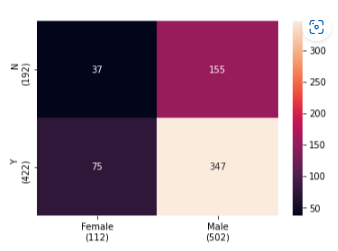
# Expected Values
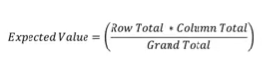
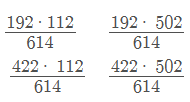
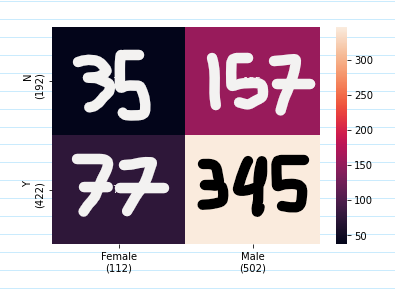

##### if the two of them are not similar there is realationship between variables.
##### if the two of them are similar there is no realationship between variables.

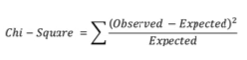

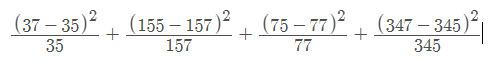

### Chi-Square = 0.198641655098822


**Degrees of freedom(df)** is a parameter that is used to determine the critical values for the test statistic, which are used to determine whether there is a significant association between two categorical variables.
#### Degrees of Freedom = (no rows -1) * (no columns-1) = 1
**p-value**, which indicates the probability of observing the contingency table (or one more extreme) under the assumption of independence.
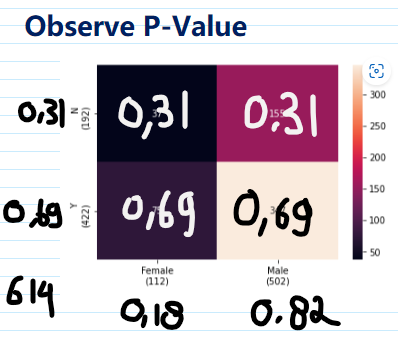
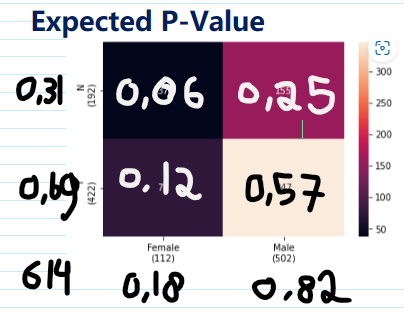
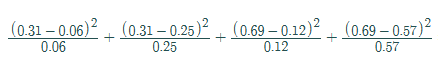
### p-Value = 3.78882



**Significance level** (also known as alpha level or level of significance) is a threshold that is used to determine whether the observed test statistic is statistically significant, i.e. whether it provides sufficient evidence to reject the null hypothesis. For example i choose **significance level 5% or 0.05**
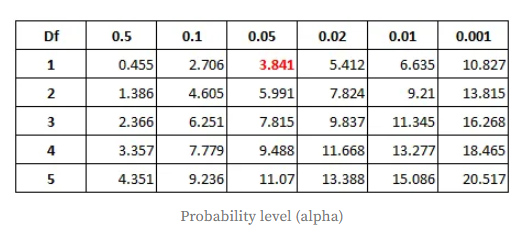
**Critical values** of the test statistic are determined based on the significance level, degree of freedom, and type of test (one-tailed or two-tailed). 
#### Critical Value = 3.84
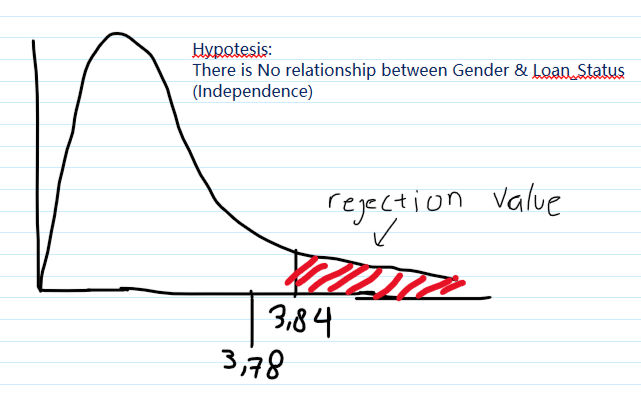
Because we are using p-values, with hypotesis: **There is no relationship between Variables(Independence). Based on the Image, the hypotesis is True**

### Chi-Square using library sklearn

In [109]:
# label encoding
from sklearn.preprocessing import LabelEncoder
for col in df_X.columns:
    le = LabelEncoder()
    df_X[col] = le.fit_transform(df_X[col])
df_X.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1,2,1
1,1,1,1,0,0,1,0,0
2,1,1,0,0,1,1,2,1
3,1,1,0,1,0,1,2,1
4,1,0,0,0,0,1,2,1


Chi-square:  [3.62343084e-02 1.78242499e+00 8.59527587e-02 3.54050246e+00
 7.28480330e-03 2.60058772e+01 3.77837464e-01]

P-values:  [8.49032435e-01 1.81851834e-01 7.69386856e-01 5.98873168e-02
 9.31982300e-01 3.40379591e-07 5.38762867e-01]


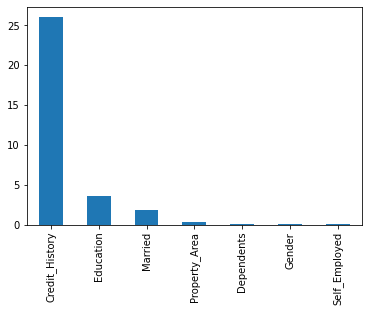

In [139]:
from sklearn.feature_selection import chi2
X = df_X.drop(columns=['Loan_Status'], axis=1)
y = df_X['Loan_Status']
chi_scores = chi2(X, y)
print(str('Chi-square: '),chi_scores[0])
print()
print(str('P-values: '),chi_scores[1])
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

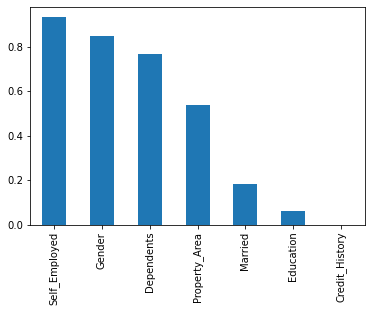

In [140]:
# if p-value > 0.5, lower the importance
chi_values = pd.Series(chi_scores[1], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

### Chi-Square using library scipy (alternative)

Chi-square:  [0.11087854691241235, 4.73187557933362, 3.1513990012324227, 4.091490413303621, 0.0013148242700656973, 176.1145746235241, 12.297623130485675]

P-values:  [0.7391461310869638, 0.029608580862582116, 0.3688663081366005, 0.04309962129357355, 0.9710746411403309, 3.4183499979091188e-40, 0.0021360187811644937]


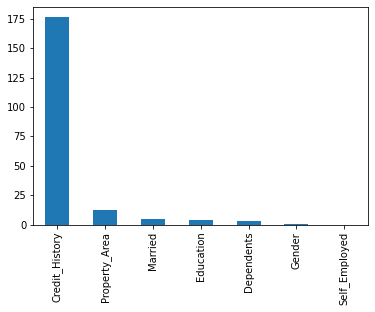

In [137]:
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
# define the classification variables
class_vars = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

# define the target variable
target_var = 'Loan_Status'

# create empty lists to store the chi-square statistic and p-value for each variable
chi2_values = []
p_values = []

# iterate through each classification variable and calculate the chi-square statistic and p-value
for var in class_vars:
    contingency_table = pd.crosstab(df[var], df[target_var])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_values.append(chi2)
    p_values.append(p_value)
print(str('Chi-square: '),chi2_values)
print()
print(str('P-values: '),p_values)
# higher the chi value, higher the importance
chi_values = pd.Series(chi2_values, index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

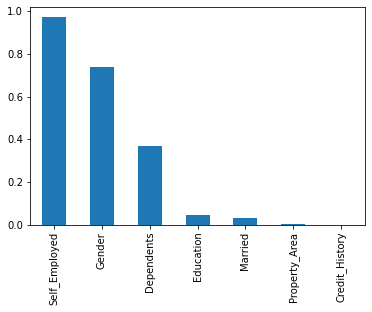

In [146]:
# if p-value > 0.5, lower the importance
chi_values = pd.Series(p_values, index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()